In [6]:
num = 5
num

5

In [7]:
import sys

import pandas as pd

print(sys.executable)


/Users/ericwiniecke/.pyenv/versions/3.12.4/envs/cost_cup_env/bin/python


         capHit  CF_Percent    season
0     3700000.0       66.25  20152016
1      800000.0       60.86  20152016
2     5500000.0       59.89  20152016
3     6000000.0       58.63  20152016
4     4875000.0       58.44  20152016
...         ...         ...       ...
1773  2250000.0       40.71  20172018
1774   925000.0       40.14  20172018
1775   612500.0       38.69  20172018
1776  1333333.0       38.31  20172018
1777   750000.0       37.90  20172018

[1778 rows x 3 columns]
Howdy Doody


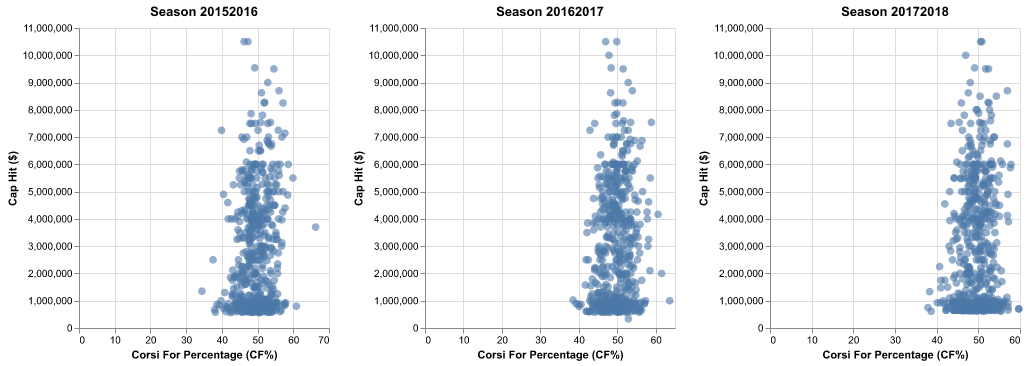

In [8]:
import altair
import os

import altair as alt
import altair_viewer
import pandas as pd
from dotenv import load_dotenv
from sqlalchemy import create_engine

# Load environment variables from .env file
load_dotenv()

# Database connection parameters
DATABASE_TYPE = os.getenv("DATABASE_TYPE")
DBAPI = os.getenv("DBAPI")
ENDPOINT = os.getenv("ENDPOINT")
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")
PORT = int(os.getenv("PORT", 5432))
DATABASE = os.getenv("DATABASE", "hockey_stats")

# Create the connection string
connection_string = (
    f"{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{ENDPOINT}:{PORT}/{DATABASE}"
)
engine = create_engine(connection_string)

# Define the seasons to query
seasons = ["20152016", "20162017", "20172018"]

# Initialize an empty DataFrame to collect all the data
df = pd.DataFrame()

# Loop through each season and query the corresponding table
for season in seasons:
    query = f"""
    SELECT "capHit", "CF_Percent"
    FROM public.aggregated_corsi_{season}
    """
    season_df = pd.read_sql(query, engine)
    season_df["season"] = season  # Add the season column manually in Python
    df = pd.concat([df, season_df], ignore_index=True)

# Ensure numeric types for Altair
df["capHit"] = pd.to_numeric(df["capHit"], errors="coerce")
df["CF_Percent"] = pd.to_numeric(df["CF_Percent"], errors="coerce")
df = df.dropna(subset=["capHit", "CF_Percent"])
print(df)
# Create scatter plots for each season using Altair
charts = []

for season in seasons:
    df_season = df[df["season"] == season]

    # Avoid empty DataFrames
    if df_season.empty:
        print(f"No data available for season {season}")
        continue

    scatter_plot = (
        alt.Chart(df_season)
        .mark_circle(size=60)
        .encode(
            x=alt.X("CF_Percent", title="Corsi For Percentage (CF%)"),
            y=alt.Y("capHit", title="Cap Hit ($)"),
            tooltip=["CF_Percent", "capHit"],
            opacity=alt.value(0.6),
        )
        .properties(title=f"Season {season}", width=250, height=300)
    )

    charts.append(scatter_plot)

# # Combine the charts into a horizontal layout
combined_chart = alt.concat(*charts, columns=3)
print("Howdy Doody")
combined_chart.show()
alt.renderers.enable('png')
combined_chart

# # Save the chart as an HTML file and open it
combined_chart.save("combined_chart.html")
# altair_viewer.show(combined_chart)


<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
/var/folders/hb/kbyr_0y166n0nvnd_cqyjzth0000gn/T/ipykernel_7589/781376528.py:9: SyntaxWarning: invalid escape sequence '\$'
  data['Total_Payroll'] = data['Total_Payroll'].replace('[\$,]', '', regex=True).astype(float)


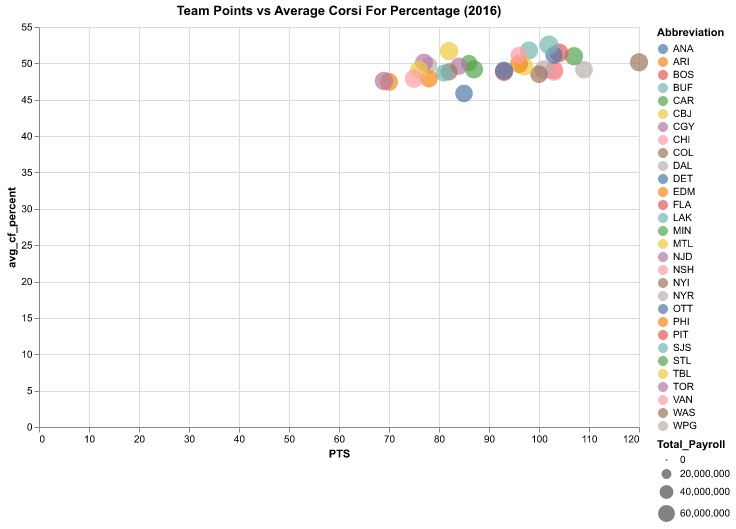

In [15]:
import pandas as pd
import altair as alt

# Load the dataset from the CSV file
#data = pd.read_csv('team_wins_and_cfpercent_2016.csv')
data = pd.read_csv(r'/Users/ericwiniecke/Documents/github/cost_cup/wins_and_cfpercent/team_wins_and_cfpercent_2016.csv')

# Clean and convert the Total_Payroll column to numerical values
data['Total_Payroll'] = data['Total_Payroll'].replace('[\$,]', '', regex=True).astype(float)

# Create a more granular scale for avg_cf_percent
cf_percent_scale = alt.Scale(domain=[45, 55]) 

# Create an Altair chart
chart = alt.Chart(data).mark_circle().encode(
    x='PTS:Q',
    y='avg_cf_percent:Q',
    size='Total_Payroll:Q',
    color='Abbreviation:N',
    tooltip=['Abbreviation', 'PTS', 'Total_Payroll', 'avg_cf_percent']
).properties(
    title='Team Points vs Average Corsi For Percentage (2016)',
    width=600,
    height=400
)

# Display the chart
chart


<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
/var/folders/hb/kbyr_0y166n0nvnd_cqyjzth0000gn/T/ipykernel_7589/109756002.py:8: SyntaxWarning: invalid escape sequence '\$'
  data['Total_Payroll'] = data['Total_Payroll'].replace('[\$,]', '', regex=True).astype(float)


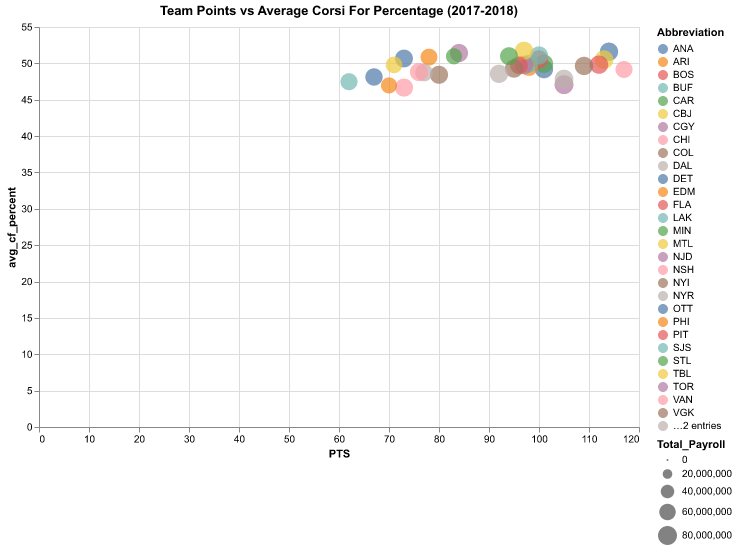

In [18]:
import pandas as pd
import altair as alt

# Load the dataset from the CSV file
data = pd.read_csv(r'/Users/ericwiniecke/Documents/github/cost_cup/wins_and_cfpercent/team_wins_and_cfpercent_2018.csv')

# Clean and convert the Total_Payroll column to numerical values
data['Total_Payroll'] = data['Total_Payroll'].replace('[\$,]', '', regex=True).astype(float)

# Increase the maximum allowable rows for Altair visualization
alt.data_transformers.disable_max_rows()

# Create an Altair chart
chart = alt.Chart(data).mark_circle().encode(
    x='PTS:Q',
    y='avg_cf_percent:Q',
    size='Total_Payroll:Q',
    color='Abbreviation:N',
    tooltip=['Abbreviation', 'PTS', 'Total_Payroll', 'avg_cf_percent']
).properties(
    title='Team Points vs Average Corsi For Percentage (2017-2018)',
    width=600,
    height=400
)

# Display the chart
chart


<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
/var/folders/hb/kbyr_0y166n0nvnd_cqyjzth0000gn/T/ipykernel_7589/1748353466.py:8: SyntaxWarning: invalid escape sequence '\$'
  data['Total_Payroll'] = data['Total_Payroll'].replace('[\$,]', '', regex=True).astype(float)


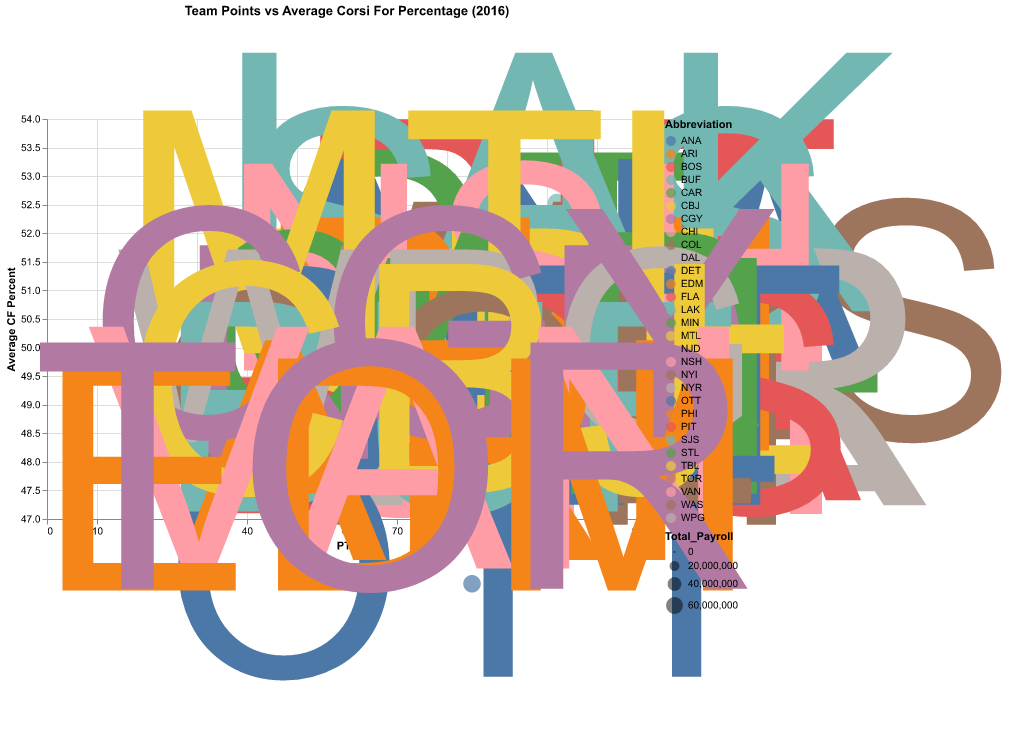

In [20]:
import pandas as pd
import altair as alt

# Load the dataset from the CSV file
data = pd.read_csv(r'/Users/ericwiniecke/Documents/github/cost_cup/wins_and_cfpercent/team_wins_and_cfpercent_2016.csv')

# Clean and convert the Total_Payroll column to numerical values
data['Total_Payroll'] = data['Total_Payroll'].replace('[\$,]', '', regex=True).astype(float)

# Increase the maximum allowable rows for Altair visualization
alt.data_transformers.disable_max_rows()

# Create a more granular scale for avg_cf_percent with domain set to 45-55
cf_percent_scale = alt.Scale(domain=[47, 54])

# Create the base chart
base_chart = alt.Chart(data).mark_circle().encode(
    x='PTS:Q',
    y=alt.Y('avg_cf_percent:Q', scale=cf_percent_scale, title='Average CF Percent'),
    size='Total_Payroll:Q',
    color='Abbreviation:N',
    tooltip=['Abbreviation', 'PTS', 'Total_Payroll', 'avg_cf_percent']
).properties(
    title='Team Points vs Average Corsi For Percentage (2016)',
    width=600,
    height=400
)

# Add text labels (team abbreviations) inside the circles
text = base_chart.mark_text(
    align='center',
    baseline='middle',
    dx=0,  # Adjust horizontally
    dy=0,  # Adjust vertically
    fontSize=10,
    color='black'
).encode(
    text='Abbreviation:N'
)

# Combine the circle and text
final_chart = base_chart + text

# Display the final chart
final_chart



<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
/var/folders/hb/kbyr_0y166n0nvnd_cqyjzth0000gn/T/ipykernel_7589/3656748908.py:8: SyntaxWarning: invalid escape sequence '\$'
  data['Total_Payroll'] = data['Total_Payroll'].replace('[\$,]', '', regex=True).astype(float)


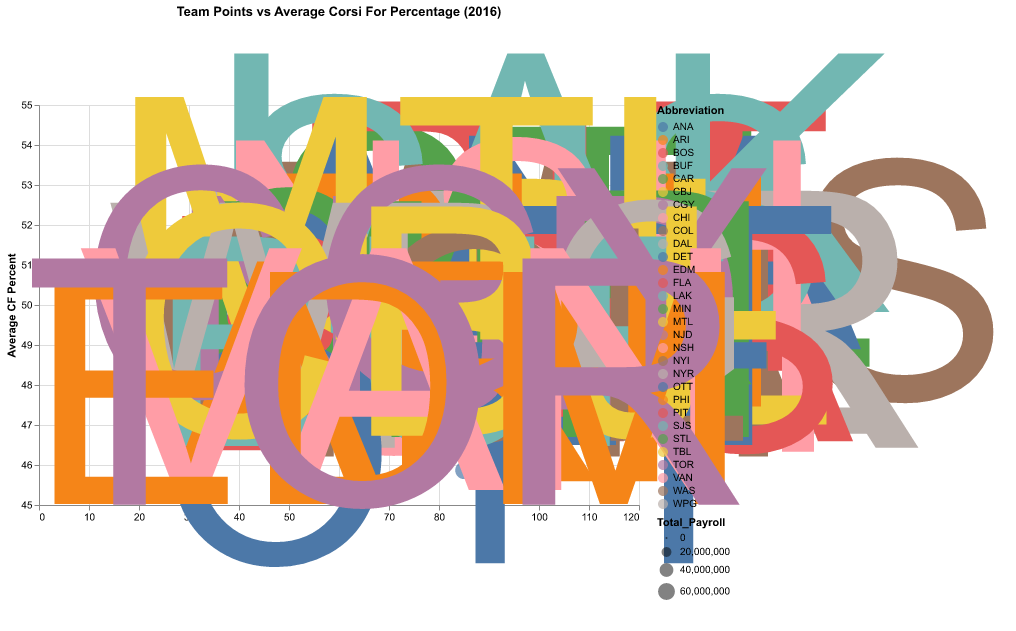

In [21]:
import pandas as pd
import altair as alt

# Load the dataset from the CSV file
data = pd.read_csv(r'/Users/ericwiniecke/Documents/github/cost_cup/wins_and_cfpercent/team_wins_and_cfpercent_2018.csv')

# Clean and convert the Total_Payroll column to numerical values
data['Total_Payroll'] = data['Total_Payroll'].replace('[\$,]', '', regex=True).astype(float)

# Increase the maximum allowable rows for Altair visualization
alt.data_transformers.disable_max_rows()

# Create a more granular scale for avg_cf_percent with domain set to 45-55
cf_percent_scale = alt.Scale(domain=[47, 54])

# Create the base chart
base_chart = alt.Chart(data).mark_circle().encode(
    x='PTS:Q',
    y=alt.Y('avg_cf_percent:Q', scale=cf_percent_scale, title='Average CF Percent'),
    size='Total_Payroll:Q',
    color='Abbreviation:N',
    tooltip=['Abbreviation', 'PTS', 'Total_Payroll', 'avg_cf_percent']
).properties(
    title='Team Points vs Average Corsi For Percentage (2016)',
    width=600,
    height=400
)

# Add text labels (team abbreviations) inside the circles with smaller font size
text = base_chart.mark_text(
    align='center',
    baseline='middle',
    dx=0,  # Adjust horizontally
    dy=0,  # Adjust vertically
    fontSize=8,  # Reduce font size to make the text smaller
    color='black'
).encode(
    text='Abbreviation:N'
)

# Combine the circle and text
final_chart = base_chart + text

# Display the final chart
final_chart
